In [267]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
sns.set_theme()

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [268]:
data = pd.read_csv("Netflix Shows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [269]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


Удалите из данных дупликаты. 

In [270]:
data = data.drop_duplicates()
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [271]:
data[data.duplicated(subset=['title'], keep=False)].sort_values(by='title')

,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
181,Skins,TV-MA,NaN,2017,NaN
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


**Эти дубликаты - разные шоу, с одинаковыми названиями.**

In [272]:
data = data.reset_index(drop=True)
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Сколько рейтинговых групп представлено в данных?

In [273]:
data.rating.nunique()

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

[Text(0.5, 0, 'User score'), Text(0, 0.5, 'Number of shows')]

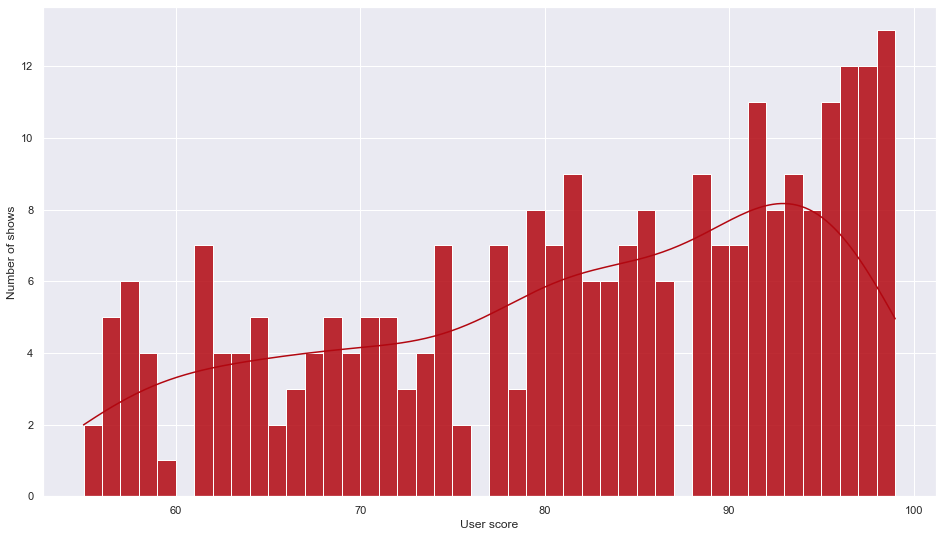

In [274]:
plt.figure(figsize=(16,9))
ax = sns.histplot(data=data, x="user rating score", binwidth=1, kde=True, color='#b20710', alpha=0.85)
ax.set(xlabel='User score', ylabel='Number of shows')

***Вывод:*** Пользователи более склонны ставить высокие оценки, чем низкие.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [275]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

***Ответ:***\
среднее: 81.398438\
стандартное отклонение: 12.730904\
минимум: 55\
максимум: 99\
медиана: 83.5\
Медиана и средняя могут отличаться в зависимости от распределения величины

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="60%">

В какие годы были запущены шоу, представленные в датасете?

In [276]:
data['release year'].unique()

array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987], dtype=int64)

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

[Text(0.5, 0, 'Release year'), Text(0, 0.5, 'Number of shows')]

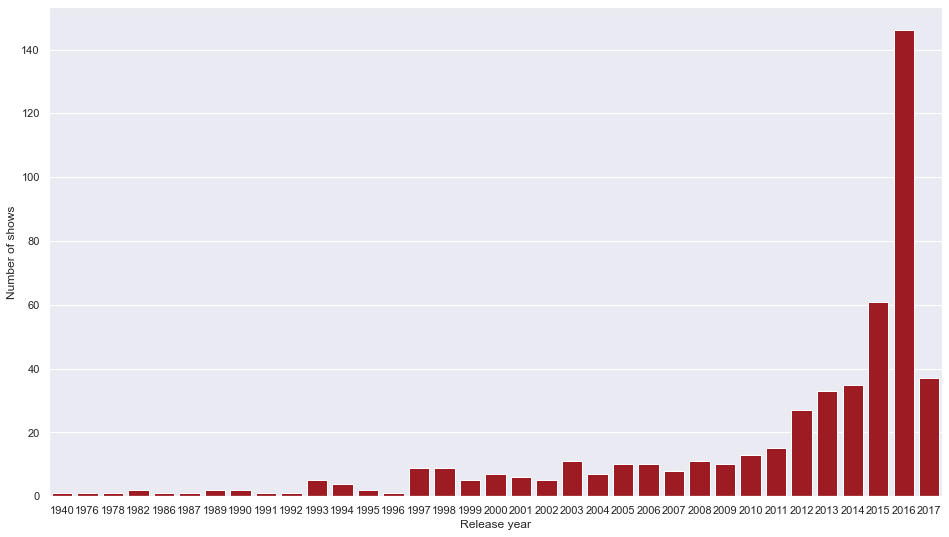

In [277]:
plt.figure(figsize=(16,9))
data_by_year = data.groupby('release year')['title'].count()
ax = sns.barplot(x=data_by_year.index, y=data_by_year, palette=['#b20710'])
ax.set(xlabel='Release year', ylabel='Number of shows')

Теперь посмотрим на выброс.

[Text(0.5, 0, 'Release year')]

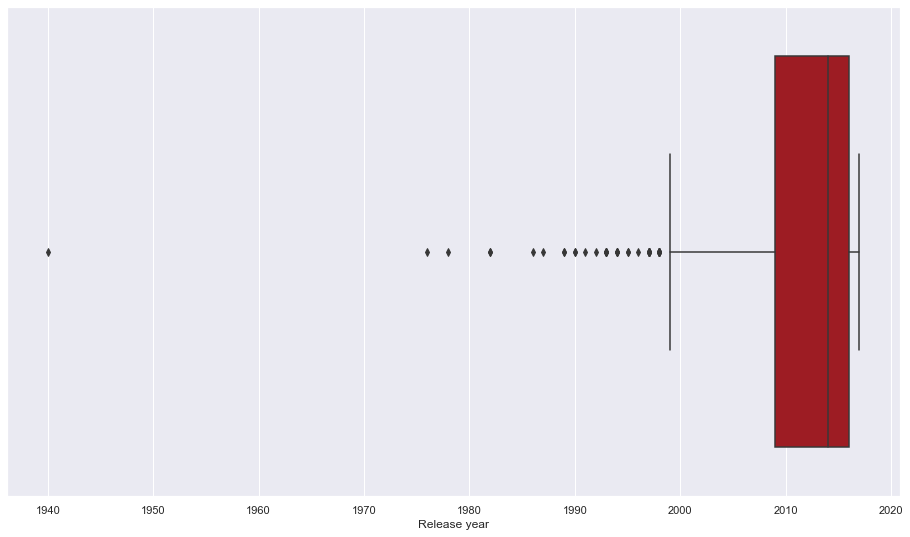

In [278]:
plt.figure(figsize=(16,9))
sns.boxplot(x=data['release year'], palette=['#b20710']).set(xlabel='Release year')

***Вывод:*** Наблюдается рост с 2010г.\
Выбросы ~до 1999г.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [279]:
data.groupby('release year').mean().loc[[2016, 2017]]

,user rating score
release year,
2016,84.313953
2017,88.125000


***Вывод:*** Средняя оценка в 2017 выше средней оценки в 2016 на 3.8 пункта.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

<AxesSubplot:title={'center':'Show distribution by rating'}, ylabel='Rating'>

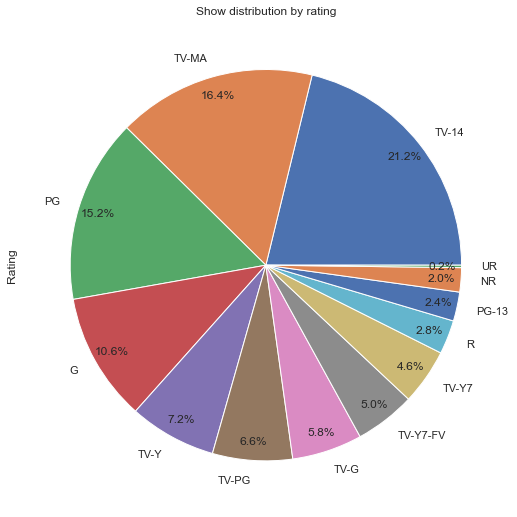

In [280]:
data.groupby('rating')['title'].count().sort_values(ascending=False).plot(kind='pie'
                                             ,figsize=(16,9)
                                             ,title='Show distribution by rating'
                                             ,ylabel='Rating'
                                             ,autopct='%1.1f%%'
                                             ,pctdistance=0.9)

***Вывод:*** Pie chart более интерпретируем, т.к. лучше видно какую долю занимает одна часть.

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

<img src="https://m.media-amazon.com/images/M/MV5BZjkzMmU5MjMtODllZS00OTA5LTk2ZTEtNjdhYjZhMDA5ZTRhXkEyXkFqcGdeQXVyOTA3MTMyOTk@._V1_FMjpg_UX1000_.jpg" width="40%">

In [281]:
data[data['title'] =='Dexter']

,title,rating,ratingLevel,release year,user rating score
229,Dexter,TV-MA,For mature audiences. May not be suitable for...,2013,95.0


In [282]:
data_with_score = data.dropna(subset=['user rating score']).reset_index(drop=True)
data_with_score

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
3,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
4,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
251,Blank Check,PG,Parental guidance suggested. May not be suitab...,1994,93.0
252,Heavyweights,PG,some rude language and pranks,1995,74.0
253,D2: The Mighty Ducks,PG,some mild language and rough hockey action,1994,70.0
254,"Honey, I Shrunk the Kids",PG,Parental guidance suggested. May not be suitab...,1989,80.0


In [283]:
round(100 * (1 - data['user rating score'].rank(pct=True).loc[229]), 1)

16.4

[Text(0.5, 0, 'User score'), Text(0, 0.5, 'Number of shows')]

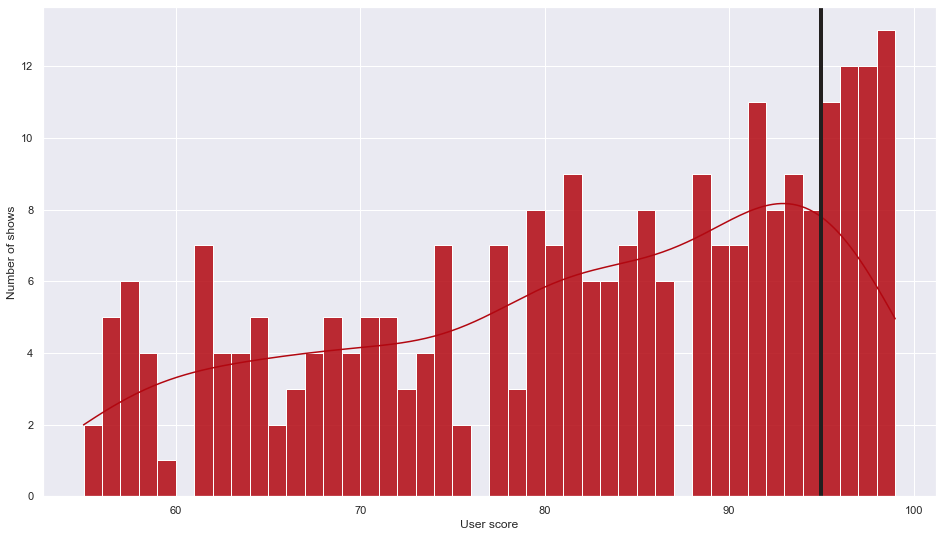

In [284]:
plt.figure(figsize=(16,9))
ax = sns.histplot(data=data_with_score, x='user rating score', binwidth=1, kde=True, color='#b20710', alpha=0.85)
ax.axvline(x=95, linewidth=4, color='#221f1f')
ax.set(xlabel='User score', ylabel='Number of shows')

In [285]:
round(100 * (1 - data[data['rating'] =='TV-MA']['user rating score'].rank(pct=True).loc[229]), 1)

22.5

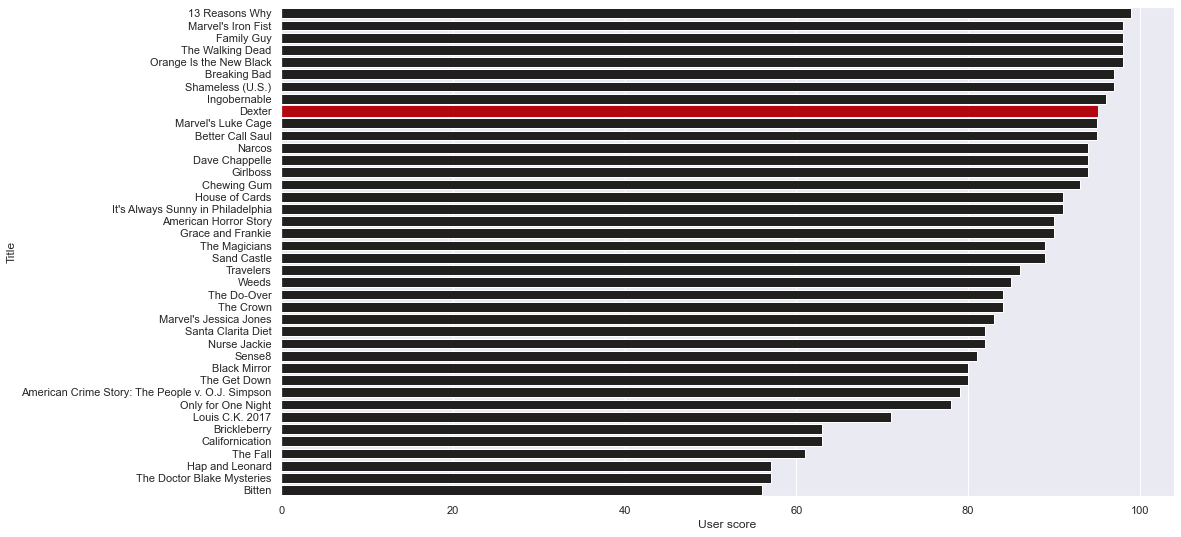

In [286]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data=data_with_score[data_with_score['rating'] =='TV-MA'].sort_values(by='user rating score',
                                                                                       ascending=False), y='title', x='user rating score', orient='h', palette=['#221f1f'])
ax.set(ylabel='Title', xlabel='User score')
ax.patches[8].set_color('#b20710')

In [287]:
round(100 * (1 - data[data['release year'] == 2013]['user rating score'].rank(pct=True).loc[229]), 1)

9.1

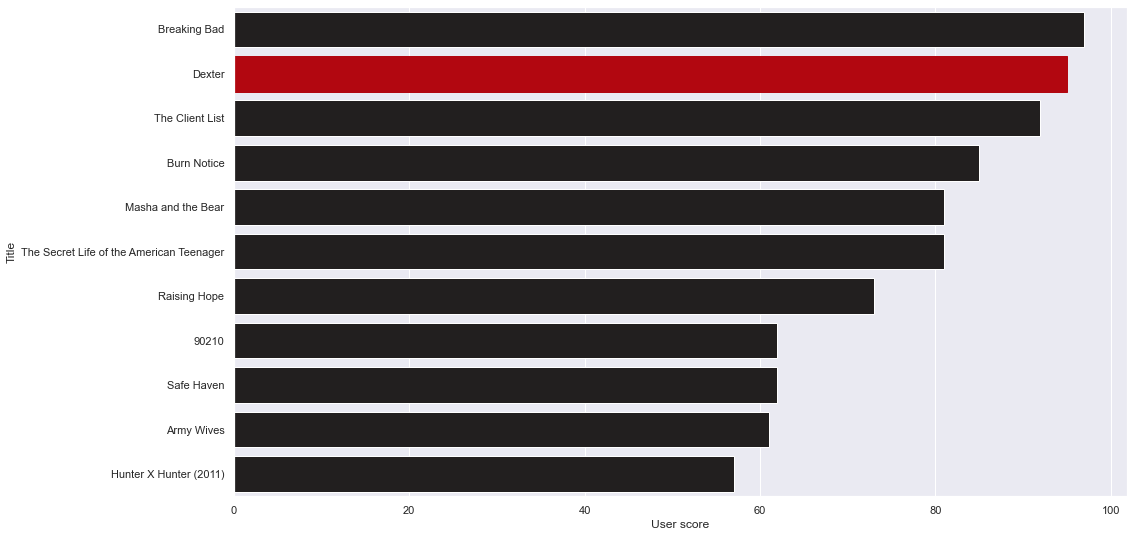

In [288]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data=data_with_score[data_with_score['release year'] == 2013].sort_values(by='user rating score',
                                                                                           ascending=False), y='title', x='user rating score', orient='h', palette=['#221f1f'])
ax.set(ylabel='Title', xlabel='User score')
ax.patches[1].set_color('#b20710')


***Вывод:*** Выберем шоу Dexter.\
Dexter по оценке пользователей входит в:
- топ 16.4% среди всех шоу
- топ 22.5% среди шоу с рейтингом TV-MA
- топ 9.1% среди шоу вышедших в 2013 году